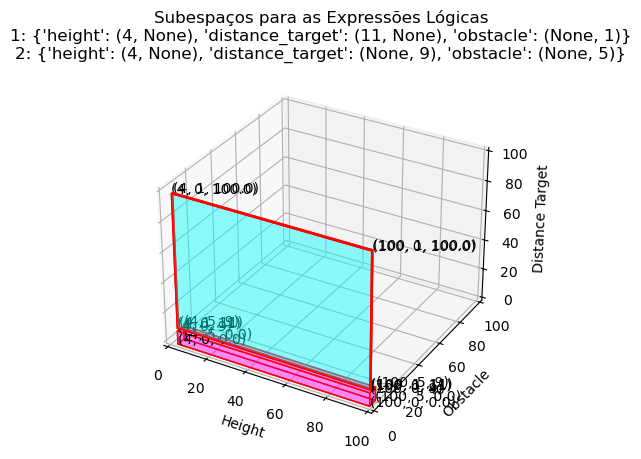

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def apply_expressions(data, expressions):
    bounds = {}
    for var in data:
        name = var['name']
        min_val = var['min_value']
        max_val = var['max_value']
        if name in expressions:
            expr_min, expr_max = expressions[name]
            if expr_min is not None:
                min_val = max(min_val, expr_min)
            if expr_max is not None:
                max_val = min(max_val, expr_max)
        bounds[name] = (min_val, max_val)
    return bounds

def plot_subspaces(expressions1, expressions2, data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    expressions_list = [
        {
            "name": "Expression 1",
            "expressions": expressions1
        },
        {
            "name": "Expression 2",
            "expressions": expressions2
        }
    ]

    colors = ['cyan', 'magenta']

    for i, expr_data in enumerate(expressions_list):
        bounds = apply_expressions(data, expr_data['expressions'])

        # Definir os limites do subespaço
        height_min, height_max = bounds['height']
        distance_min, distance_max = bounds['distance_target']
        obstacle_min, obstacle_max = bounds['obstacle']

        # Definir os vértices do cubo
        vertices = [
            [height_min, obstacle_min, distance_min],
            [height_max, obstacle_min, distance_min],
            [height_max, obstacle_max, distance_min],
            [height_min, obstacle_max, distance_min],
            [height_min, obstacle_min, distance_max],
            [height_max, obstacle_min, distance_max],
            [height_max, obstacle_max, distance_max],
            [height_min, obstacle_max, distance_max]
        ]

        # Definir as faces do cubo
        faces = [
            [vertices[0], vertices[1], vertices[5], vertices[4]],  # Face inferior
            [vertices[2], vertices[3], vertices[7], vertices[6]],  # Face superior
            [vertices[0], vertices[3], vertices[7], vertices[4]],  # Face esquerda
            [vertices[1], vertices[2], vertices[6], vertices[5]],  # Face direita
            [vertices[0], vertices[1], vertices[2], vertices[3]],  # Face frontal
            [vertices[4], vertices[5], vertices[6], vertices[7]]   # Face traseira
        ]

        # Criar a coleção de polígonos e adicioná-la ao gráfico
        poly3d = Poly3DCollection(faces, facecolors=colors[i], linewidths=1, edgecolors='r', alpha=.25)
        ax.add_collection3d(poly3d)

        # Adicionar etiquetas com os valores dos limites
        for vert in vertices:
            ax.text(vert[0], vert[1], vert[2], f'({vert[0]}, {vert[1]}, {vert[2]})', color='black')

    # Etiquetas dos eixos
    ax.set_xlabel('Height')
    ax.set_ylabel('Obstacle')
    ax.set_zlabel('Distance Target')

    # Definir os limites dos eixos
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.set_zlim([0, 100])

    # Título com as expressões lógicas
    title = ('Subespaços para as Expressões Lógicas\n'
             f'1: {expressions1}\n'
             f'2: {expressions2}')
    ax.set_title(title)

    plt.show()

# Exemplo de uso
data = [
    {
      "name": "height",
      "min_value": 0,
      "max_value": 100
    },
    {
      "name": "distance_target",
      "min_value": 0.0,
      "max_value": 100.0
    },
    {
      "name": "obstacle",
      "min_value": 0,
      "max_value": 100
    }
]

expressions1 = {
    "height": (4, None),
    "distance_target": (11, None),
    "obstacle": (None, 1)
}

expressions2 = {
    "height": (4, None),
    "distance_target": (None, 9),
    "obstacle": (None, 5)
}

plot_subspaces(expressions1, expressions2, data)


In [32]:
import plotly.graph_objects as go

def apply_expressions(data, expressions):
    bounds = {}
    for var in data:
        name = var['name']
        min_val = var['min_value']
        max_val = var['max_value']
        if name in expressions:
            expr_min, expr_max = expressions[name]
            if expr_min is not None:
                min_val = max(min_val, expr_min)
            if expr_max is not None:
                max_val = min(max_val, expr_max)
        bounds[name] = (min_val, max_val)
    return bounds

def plot_subspaces(expressions1, expressions2, data):
    fig = go.Figure()

    expressions_list = [
        {
            "name": "Expression 1",
            "expressions": expressions1
        },
        {
            "name": "Expression 2",
            "expressions": expressions2
        }
    ]

    colors = ['cyan', 'magenta']

    for i, expr_data in enumerate(expressions_list):
        bounds = apply_expressions(data, expr_data['expressions'])

        # Definir os limites do subespaço
        height_min, height_max = bounds['height']
        distance_min, distance_max = bounds['distance_target']
        obstacle_min, obstacle_max = bounds['obstacle']

        # Definir os vértices do cubo
        vertices = [
            [height_min, obstacle_min, distance_min],
            [height_max, obstacle_min, distance_min],
            [height_max, obstacle_max, distance_min],
            [height_min, obstacle_max, distance_min],
            [height_min, obstacle_min, distance_max],
            [height_max, obstacle_min, distance_max],
            [height_max, obstacle_max, distance_max],
            [height_min, obstacle_max, distance_max]
        ]

        # Definir as faces do cubo
        faces = [
            [vertices[0], vertices[1], vertices[5], vertices[4]],  # Face inferior
            [vertices[2], vertices[3], vertices[7], vertices[6]],  # Face superior
            [vertices[0], vertices[3], vertices[7], vertices[4]],  # Face esquerda
            [vertices[1], vertices[2], vertices[6], vertices[5]],  # Face direita
            [vertices[0], vertices[1], vertices[2], vertices[3]],  # Face frontal
            [vertices[4], vertices[5], vertices[6], vertices[7]]   # Face traseira
        ]

        # Adicionar as faces ao gráfico
        x, y, z = zip(*vertices)
        i_faces = [0, 1, 5, 4, 2, 3, 7, 6, 0, 3, 7, 4, 1, 2, 6, 5, 0, 1, 2, 3, 4, 5, 6, 7]
        j_faces = [1, 2, 6, 5, 3, 0, 4, 7, 3, 0, 4, 7, 2, 3, 7, 6, 1, 2, 6, 5, 0, 1, 5, 4]
        k_faces = [5, 6, 2, 1, 7, 4, 0, 3, 7, 4, 0, 3, 6, 7, 3, 2, 6, 7, 3, 2, 5, 6, 2, 1]

        fig.add_trace(go.Mesh3d(
            x=x, y=y, z=z,
            i=i_faces, j=j_faces, k=k_faces,
            color=colors[i], opacity=0.5,
            name=expr_data['name']
        ))

        # Adicionar etiquetas com os valores dos limites
        for vert in vertices:
            fig.add_trace(go.Scatter3d(
                x=[vert[0]], y=[vert[1]], z=[vert[2]],
                text=f'({vert[0]}, {vert[1]}, {vert[2]})',
                mode='text',
                showlegend=False
            ))

    # Configurar o layout do gráfico
    fig.update_layout(
        scene=dict(
            xaxis_title='Height',
            yaxis_title='Obstacle',
            zaxis_title='Distance Target',
            xaxis=dict(range=[0, 100]),
            yaxis=dict(range=[0, 100]),
            zaxis=dict(range=[0, 100])
        ),
        title_text=('Subespaços para as Expressões Lógicas<br>'
                    f'1: {expressions1}<br>'
                    f'2: {expressions2}')
    )

    fig.show()

# Exemplo de uso
data = [
    {
      "name": "height",
      "min_value": 0,
      "max_value": 100
    },
    {
      "name": "distance_target",
      "min_value": 0.0,
      "max_value": 100.0
    },
    {
      "name": "obstacle",
      "min_value": 0,
      "max_value": 100
    }
]

expressions1 = {
    "height": (3, None),
    "distance_target": (1, None),
    "obstacle": (None, 10)
}

expressions2 = {
    "height": (3, None),
    "distance_target": (10, None),
    "obstacle": (None, 10)
}

plot_subspaces(expressions1, expressions2, data)


In [33]:
import plotly.graph_objects as go

def apply_expressions(data, expressions):
    bounds = {}
    for var in data:
        name = var['name']
        min_val = var['min_value']
        max_val = var['max_value']
        if name in expressions:
            expr_min, expr_max = expressions[name]
            if expr_min is not None:
                min_val = max(min_val, expr_min)
            if expr_max is not None:
                max_val = min(max_val, expr_max)
        bounds[name] = (min_val, max_val)
    return bounds

def plot_subspaces(expressions1, expressions2, data):
    fig = go.Figure()

    expressions_list = [
        {
            "name": "Expression 1",
            "expressions": expressions1
        },
        {
            "name": "Expression 2",
            "expressions": expressions2
        }
    ]

    colors = ['rgba(0, 255, 255, 0.5)', 'rgba(255, 0, 255, 0.5)']  # Cores ciano e magenta com 50% de opacidade

    for i, expr_data in enumerate(expressions_list):
        bounds = apply_expressions(data, expr_data['expressions'])

        # Definir os limites do subespaço
        height_min, height_max = bounds['height']
        distance_min, distance_max = bounds['distance_target']
        obstacle_min, obstacle_max = bounds['obstacle']

        # Definir os vértices do cubo
        vertices = [
            [height_min, obstacle_min, distance_min],
            [height_max, obstacle_min, distance_min],
            [height_max, obstacle_max, distance_min],
            [height_min, obstacle_max, distance_min],
            [height_min, obstacle_min, distance_max],
            [height_max, obstacle_min, distance_max],
            [height_max, obstacle_max, distance_max],
            [height_min, obstacle_max, distance_max]
        ]

        # Definir as faces do cubo
        faces = [
            [vertices[0], vertices[1], vertices[5], vertices[4]],  # Face inferior
            [vertices[2], vertices[3], vertices[7], vertices[6]],  # Face superior
            [vertices[0], vertices[3], vertices[7], vertices[4]],  # Face esquerda
            [vertices[1], vertices[2], vertices[6], vertices[5]],  # Face direita
            [vertices[0], vertices[1], vertices[2], vertices[3]],  # Face frontal
            [vertices[4], vertices[5], vertices[6], vertices[7]]   # Face traseira
        ]

        # Adicionar as faces ao gráfico
        x, y, z = zip(*vertices)
        i_faces = [0, 1, 5, 4, 2, 3, 7, 6, 0, 3, 7, 4, 1, 2, 6, 5, 0, 1, 2, 3, 4, 5, 6, 7]
        j_faces = [1, 2, 6, 5, 3, 0, 4, 7, 3, 0, 4, 7, 2, 3, 7, 6, 1, 2, 6, 5, 0, 1, 5, 4]
        k_faces = [5, 6, 2, 1, 7, 4, 0, 3, 7, 4, 0, 3, 6, 7, 3, 2, 6, 7, 3, 2, 5, 6, 2, 1]

        fig.add_trace(go.Mesh3d(
            x=x, y=y, z=z,
            i=i_faces, j=j_faces, k=k_faces,
            color=colors[i], opacity=0.5,
            name=expr_data['name'],
            legendgroup=expr_data['name']
        ))

        # Adicionar etiquetas com os valores dos limites
        for vert in vertices:
            fig.add_trace(go.Scatter3d(
                x=[vert[0]], y=[vert[1]], z=[vert[2]],
                text=f'({vert[0]}, {vert[1]}, {vert[2]})',
                mode='text',
                showlegend=False
            ))

    # Configurar o layout do gráfico
    fig.update_layout(
        scene=dict(
            xaxis_title='Height',
            yaxis_title='Obstacle',
            zaxis_title='Distance Target',
            xaxis=dict(range=[0, 100]),
            yaxis=dict(range=[0, 100]),
            zaxis=dict(range=[0, 100])
        ),
        title_text=('Subespaços para as Expressões Lógicas<br>'
                    f'1: {expressions1}<br>'
                    f'2: {expressions2}'),
        legend_title_text='Figuras Geométricas'
    )

    fig.show()

# Exemplo de uso
data = [
    {
      "name": "height",
      "min_value": 0,
      "max_value": 100
    },
    {
      "name": "distance_target",
      "min_value": 0.0,
      "max_value": 100.0
    },
    {
      "name": "obstacle",
      "min_value": 0,
      "max_value": 100
    }
]

expressions1 = {
    "height": (3, None),
    "distance_target": (1, None),
    "obstacle": (None, 10)
}

expressions2 = {
    "height": (3, None),
    "distance_target": (10, None),
    "obstacle": (None, 10)
}

plot_subspaces(expressions1, expressions2, data)


In [34]:
import plotly.graph_objects as go

def apply_expressions(data, expressions):
    bounds = {}
    for var in data:
        name = var['name']
        min_val = var['min_value']
        max_val = var['max_value']
        if name in expressions:
            expr_min, expr_max = expressions[name]
            if expr_min is not None:
                min_val = max(min_val, expr_min)
            if expr_max is not None:
                max_val = min(max_val, expr_max)
        bounds[name] = (min_val, max_val)
    return bounds

def plot_subspaces(expressions1, expressions2, data):
    fig = go.Figure()

    expressions_list = [
        {
            "name": "Expression 1",
            "expressions": expressions1
        },
        {
            "name": "Expression 2",
            "expressions": expressions2
        }
    ]

    colors = ['blue', 'red']  # Cores das arestas

    for i, expr_data in enumerate(expressions_list):
        bounds = apply_expressions(data, expr_data['expressions'])

        # Definir os limites do subespaço
        height_min, height_max = bounds['height']
        distance_min, distance_max = bounds['distance_target']
        obstacle_min, obstacle_max = bounds['obstacle']

        # Definir os vértices do cubo
        vertices = [
            [height_min, obstacle_min, distance_min],
            [height_max, obstacle_min, distance_min],
            [height_max, obstacle_max, distance_min],
            [height_min, obstacle_max, distance_min],
            [height_min, obstacle_min, distance_max],
            [height_max, obstacle_min, distance_max],
            [height_max, obstacle_max, distance_max],
            [height_min, obstacle_max, distance_max]
        ]

        # Definir as arestas do cubo
        edges = [
            (0, 1), (1, 2), (2, 3), (3, 0),  # Base inferior
            (4, 5), (5, 6), (6, 7), (7, 4),  # Base superior
            (0, 4), (1, 5), (2, 6), (3, 7)   # Laterais
        ]

        # Adicionar as arestas ao gráfico
        for edge in edges:
            fig.add_trace(go.Scatter3d(
                x=[vertices[edge[0]][0], vertices[edge[1]][0]],
                y=[vertices[edge[0]][1], vertices[edge[1]][1]],
                z=[vertices[edge[0]][2], vertices[edge[1]][2]],
                mode='lines',
                line=dict(color=colors[i], width=5),
                name=expr_data['name'],
                legendgroup=expr_data['name'],
                showlegend=(i == 0)  # Mostrar legenda apenas para o primeiro traço de cada figura
            ))

        # Adicionar etiquetas com os valores dos limites
        for vert in vertices:
            fig.add_trace(go.Scatter3d(
                x=[vert[0]], y=[vert[1]], z=[vert[2]],
                text=f'({vert[0]}, {vert[1]}, {vert[2]})',
                mode='text',
                showlegend=False
            ))

    # Configurar o layout do gráfico
    fig.update_layout(
        scene=dict(
            xaxis_title='Height',
            yaxis_title='Obstacle',
            zaxis_title='Distance Target',
            xaxis=dict(range=[0, 100]),
            yaxis=dict(range=[0, 100]),
            zaxis=dict(range=[0, 100])
        ),
        title_text=('Subespaços para as Expressões Lógicas<br>'
                    f'1: {expressions1}<br>'
                    f'2: {expressions2}'),
        legend_title_text='Figuras Geométricas'
    )

    fig.show()

# Exemplo de uso
data = [
    {
      "name": "height",
      "min_value": 0,
      "max_value": 100
    },
    {
      "name": "distance_target",
      "min_value": 0.0,
      "max_value": 100.0
    },
    {
      "name": "obstacle",
      "min_value": 0,
      "max_value": 100
    }
]

expressions1 = {
    "height": (3, None),
    "distance_target": (None, 10),
    "obstacle": (None, 10)
}

expressions2 = {
    "height": (3, None),
    "distance_target": (10, None),
    "obstacle": (None, 10)
}

plot_subspaces(expressions1, expressions2, data)
